In [6]:
# Reference: https://spacetelescope.github.io/mast_notebooks/notebooks/TESS/beginner_how_to_use_lc/beginner_how_to_use_lc.html

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [7]:
filepath = 'tess2019198215352-s0014-0000000267574918-0150-s_lc.fits'

fits.info(filepath)
fits.getdata(filepath, ext=1).columns

Filename: tess2019198215352-s0014-0000000267574918-0150-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19337R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [9]:
with fits.open(filepath, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']          # raw flux
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']    # corrected flux (use this one!)

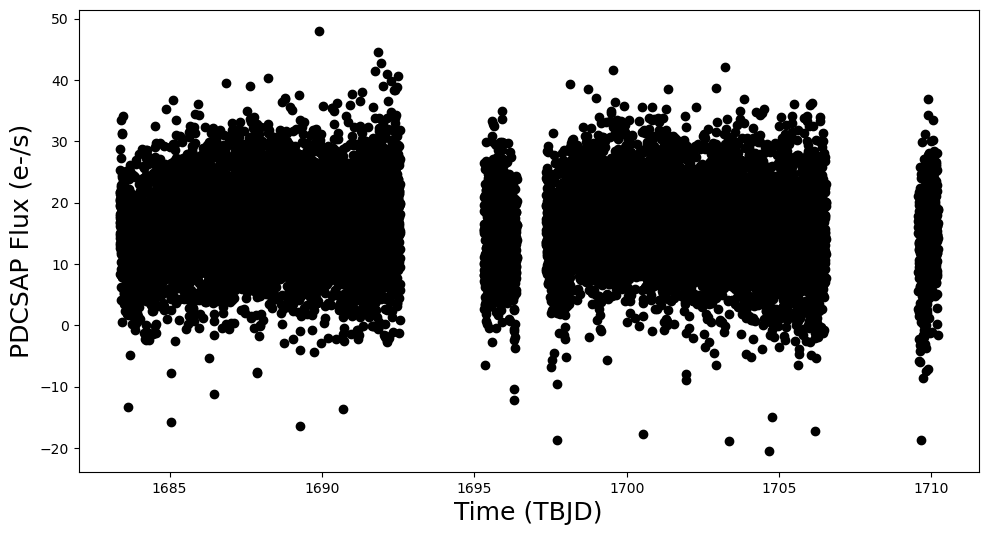

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

ax.set_ylabel("PDCSAP Flux (e-/s)", fontsize=18)
ax.set_xlabel("Time (TBJD)", fontsize=18)

plt.subplots_adjust(left=0.15) # avoid cutting off y-axis label
plt.show()

In [47]:
start_time = tess_bjds[0]+2457000
end_time = tess_bjds[-1]+2457000

t0 = 2458779.3750828
P = 1.4079405

start_epoch = int((t0 - start_time) // P)
stop_epoch = int((t0 - end_time) // P)

transit_times = [t0 - P*n - 2457000 for n in range(start_epoch, stop_epoch, -1)]

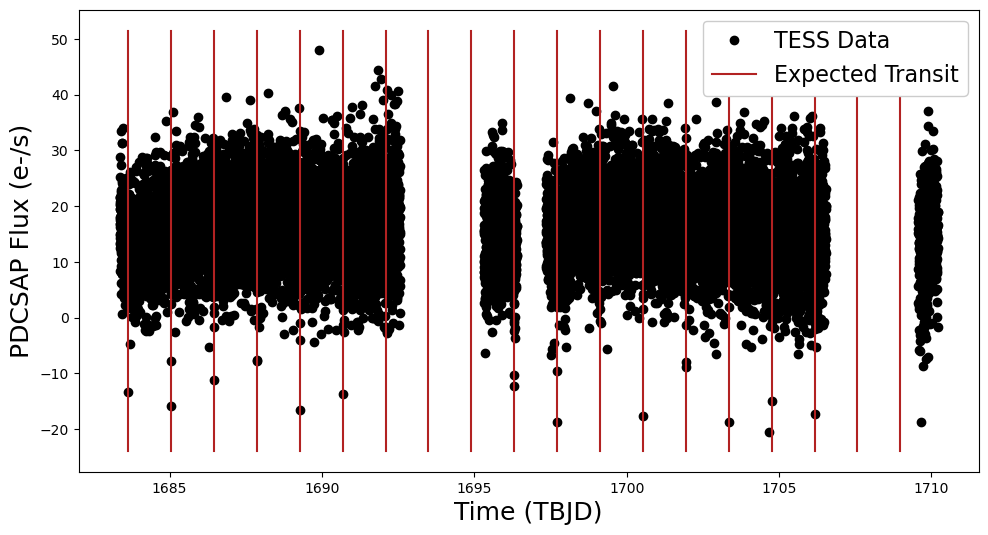

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(tess_bjds, pdcsap_fluxes, 'ko', label='TESS Data')

ymin, ymax = fig.axes[0].get_ylim()

for i, time in enumerate(transit_times):
    if i==0:
        ax.plot([time, time], [ymin, ymax], color='firebrick', label='Expected Transit')
    else:
        ax.plot([time, time], [ymin, ymax], color='firebrick')

ax.set_ylabel("PDCSAP Flux (e-/s)", fontsize=18)
ax.set_xlabel("Time (TBJD)", fontsize=18)

ax.legend(loc='upper right', fontsize=16, framealpha=1)

plt.subplots_adjust(left=0.15) # avoid cutting off y-axis label
plt.show()